In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display, FileLink
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import mode, skew, kurtosis
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adamax
from sklearn import preprocessing
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import Initializer
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
class Sivanandam(Initializer):
    def __init__(self, pm):
        self.pm = pm

    def __call__(self, shape, dtype=None):
        limit = 3 / np.sqrt(self.pm)
        return np.random.uniform(-limit, limit, size=shape)

In [3]:
link1 = 'https://raw.githubusercontent.com/Fairtexas5/Rainfall/main/Whole_data/old_dataset.csv'
link2 = 'https://raw.githubusercontent.com/Fairtexas5/Rainfall/main/Whole_data/New_data_2010.csv'
link3 = 'https://raw.githubusercontent.com/Fairtexas5/Rainfall/main/Whole_data/New_data_2016.csv'

data2 = pd.read_csv(link2)

  

In [4]:
BP_data = [5, 6, 7, 8, 9]
def Maker_dataset(dataset, name):
    for i, BP in enumerate(name):
        num_cols = BP_data[i]
        for j in range(num_cols+1):
            BP[f't-{num_cols - j}'] = (dataset[j:140 - num_cols + j] * 10).reset_index(drop=True)

        BP.reset_index(drop=True, inplace=True)

In [5]:
dataset = data2

aug_column = dataset['AUG']

AUG_BP1 = pd.DataFrame()
AUG_BP2 = pd.DataFrame()
AUG_BP3 = pd.DataFrame()
AUG_BP4 = pd.DataFrame()
AUG_BP5 = pd.DataFrame()

Aug_Data_all = [AUG_BP1, AUG_BP2, AUG_BP3, AUG_BP4, AUG_BP5]

# Generate data for each month
Maker_dataset(aug_column, 
            Aug_Data_all)

for i in range(5):
    print(f"BP{i+1}:\n", Aug_Data_all[i].head())

BP1:
       t-5     t-4     t-3     t-2     t-1     t-0
0  1794.0  2452.0  2142.0  2335.0  2187.0  1956.0
1  2452.0  2142.0  2335.0  2187.0  1956.0  1569.0
2  2142.0  2335.0  2187.0  1956.0  1569.0  3393.0
3  2335.0  2187.0  1956.0  1569.0  3393.0  3221.0
4  2187.0  1956.0  1569.0  3393.0  3221.0  1768.0
BP2:
       t-6     t-5     t-4     t-3     t-2     t-1     t-0
0  1794.0  2452.0  2142.0  2335.0  2187.0  1956.0  1569.0
1  2452.0  2142.0  2335.0  2187.0  1956.0  1569.0  3393.0
2  2142.0  2335.0  2187.0  1956.0  1569.0  3393.0  3221.0
3  2335.0  2187.0  1956.0  1569.0  3393.0  3221.0  1768.0
4  2187.0  1956.0  1569.0  3393.0  3221.0  1768.0  2646.0
BP3:
       t-7     t-6     t-5     t-4     t-3     t-2     t-1     t-0
0  1794.0  2452.0  2142.0  2335.0  2187.0  1956.0  1569.0  3393.0
1  2452.0  2142.0  2335.0  2187.0  1956.0  1569.0  3393.0  3221.0
2  2142.0  2335.0  2187.0  1956.0  1569.0  3393.0  3221.0  1768.0
3  2335.0  2187.0  1956.0  1569.0  3393.0  3221.0  1768.0  2646.0
4  2

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

1
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Training Data:
Mean Observed: 2231.609164062433
Mean Predicted: 2239.792724609375
SD Observed: 128.6539813446133
SD Predicted: 127.7785415649414
Correlation Coefficient (CC): 0.999033158264639
Root Mean Squared Error (RMSE): 9.976032282586447
Percentage Bias (PP): -0.3667111911318945%

Testing Data:
Mean Observed: 2229.291800404544
Mean Predicted: 2235.795166015625
SD Observed: 99.13771312185173
SD Predicted: 100.17599487304688
Correlation Coefficient (CC): 0.9981920824170449
Root Mean Squared Error (RMSE): 8.903974543338292
Percentage Bias (PP): -0.29172338990798474%


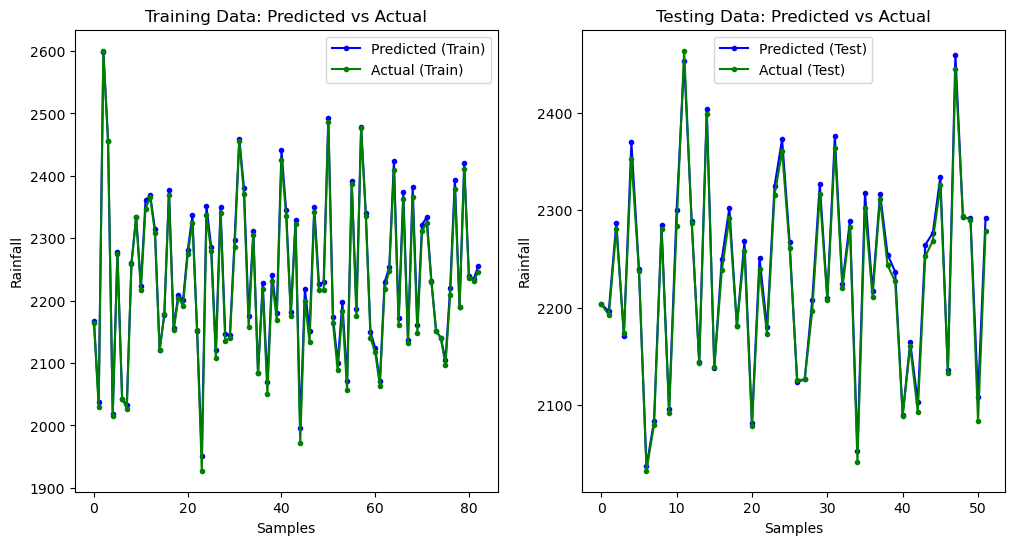

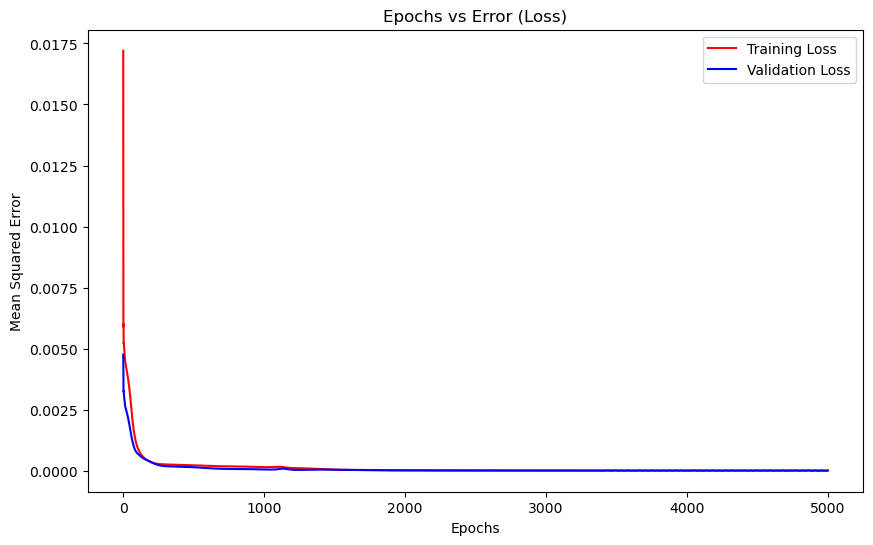

In [32]:
# Set random seeds
np.random.seed(2)
tf.random.set_seed(2)

# Define the number of layers and load the dataset
Layers = 5
dataset = Aug_Data_all[0]

# Prepare the input features and labels
X = dataset.iloc[:, 0:Layers+1].values
X = preprocessing.normalize(X)

y = X[:, Layers]
X = X[:, 0:Layers]

min_values = dataset.iloc[:, 0:Layers+1].min()
max_values = dataset.iloc[:, 0:Layers+1].max()

# Reshape X to be 3D for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
split_index = int(0.62 * len(X))  

# Sequentially split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

pm = X.shape[1]
print(X.shape[1])
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape in the Input layer
model.add(LSTM(units=Layers+1, kernel_initializer=Sivanandam(pm), activation='tanh'))  # Replace 'Sivanandam' with a standard initializer like glorot_uniform
model.add(Dense(units=1, kernel_initializer=Sivanandam(pm),activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5000,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False,
    # callbacks=[early_stopping]  # Add early stopping callback
)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match the shape of y_train and y_test
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

bp1_predictions_train = y_train_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp1_actual_train = y_train * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

bp1_predictions_test = y_test_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp1_actual_test = y_test * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

# Calculating statistics for training data
mean_pred_train = np.mean(bp1_predictions_train)
mean_act_train = np.mean(bp1_actual_train)
sd_pred_train = np.std(bp1_predictions_train)
sd_act_train = np.std(bp1_actual_train)
cc_train = np.corrcoef(bp1_predictions_train.flatten(), bp1_actual_train.flatten())[0, 1]
rmse_train = np.sqrt(np.mean((bp1_predictions_train - bp1_actual_train) ** 2))
pp_train = 100 * (mean_act_train - mean_pred_train) / mean_act_train

# Calculating statistics for testing data
mean_pred_test = np.mean(bp1_predictions_test)
mean_act_test = np.mean(bp1_actual_test)
sd_pred_test = np.std(bp1_predictions_test)
sd_act_test = np.std(bp1_actual_test)
cc_test = np.corrcoef(bp1_predictions_test.flatten(), bp1_actual_test.flatten())[0, 1]
rmse_test = np.sqrt(np.mean((bp1_predictions_test - bp1_actual_test) ** 2))
pp_test = 100 * (mean_act_test - mean_pred_test) / mean_act_test

# Output the results for training data
print(f"Training Data:")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"SD Observed: {sd_act_train}")
print(f"SD Predicted: {sd_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output the results for testing data
print(f"\nTesting Data:")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"SD Observed: {sd_act_test}")
print(f"SD Predicted: {sd_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Predicted vs Actual Results for Training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bp1_predictions_train, '.-', color='blue', label='Predicted (Train)')
plt.plot(bp1_actual_train, '.-', color='green', label='Actual (Train)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Training Data: Predicted vs Actual')
plt.legend()

# Plotting Predicted vs Actual Results for Testing data
plt.subplot(1, 2, 2)
plt.plot(bp1_predictions_test, '.-', color='blue', label='Predicted (Test)')
plt.plot(bp1_actual_test, '.-', color='green', label='Actual (Test)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Testing Data: Predicted vs Actual')
plt.legend()

plt.show()

# Plotting Epochs vs Error (Loss) for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs Error (Loss)')
plt.legend()
plt.show()


1
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Training Data:
Mean Observed: 2173.8350784270588
Mean Predicted: 2200.83154296875
SD Observed: 120.33997453902552
SD Predicted: 119.29708862304688
Correlation Coefficient (CC): 0.9891422505331673
Root Mean Squared Error (RMSE): 32.27462103953001
Percentage Bias (PP): -1.2418819076755956%

Testing Data:
Mean Observed: 2170.2720420168766
Mean Predicted: 2189.435302734375
SD Observed: 90.64887943344104
SD Predicted: 84.04715728759766
Correlation Coefficient (CC): 0.9834772398378557
Root Mean Squared Error (RMSE): 25.740402177279588
Percentage Bias (PP): -0.8829888763479423%


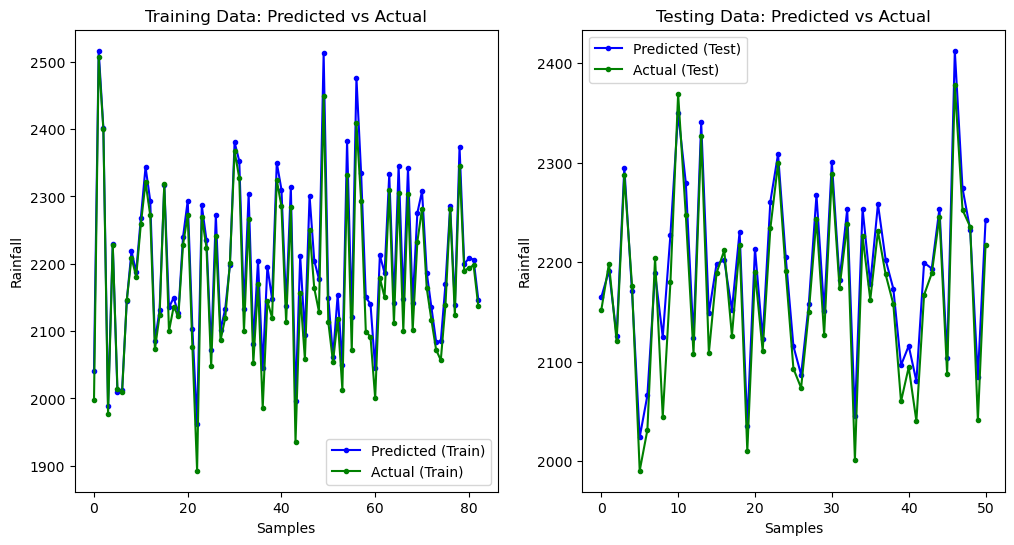

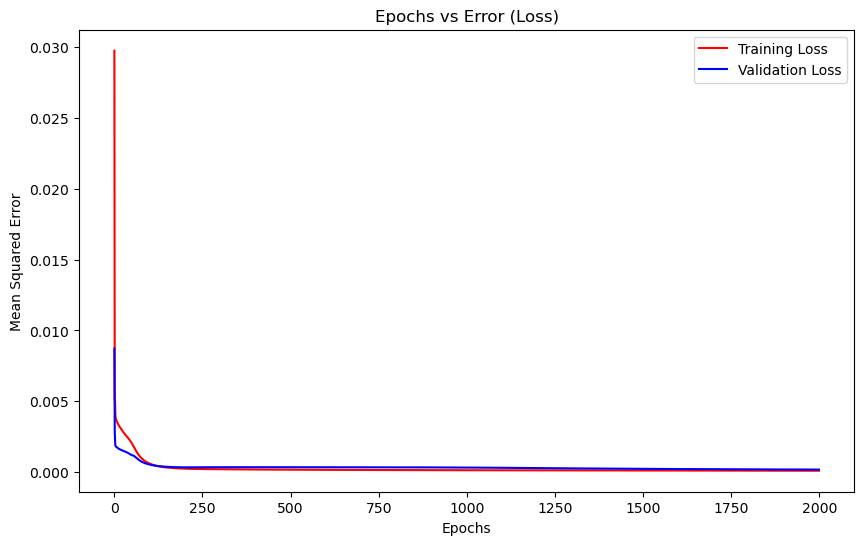

In [33]:
# Set random seeds
np.random.seed(2)
tf.random.set_seed(2)

# Define the number of layers and load the dataset
Layers = 6
dataset = Aug_Data_all[1]

# Prepare the input features and labels
X = dataset.iloc[:, 0:Layers+1].values
X = preprocessing.normalize(X)

y = X[:, Layers]
X = X[:, 0:Layers]

min_values = dataset.iloc[:, 0:Layers+1].min()
max_values = dataset.iloc[:, 0:Layers+1].max()

# Reshape X to be 3D for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
split_index = int(0.62 * len(X))  

# Sequentially split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

pm = X.shape[1]
print(X.shape[1])
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape in the Input layer
model.add(LSTM(units=Layers+1, kernel_initializer=Sivanandam(pm), activation='tanh'))  # Replace 'Sivanandam' with a standard initializer like glorot_uniform
model.add(Dense(units=1, kernel_initializer=Sivanandam(pm),activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=5,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False,
    # callbacks=[early_stopping]  # Add early stopping callback
)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match the shape of y_train and y_test
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

bp2_predictions_train = y_train_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp2_actual_train = y_train * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

bp2_predictions_test = y_test_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp2_actual_test = y_test * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

# Calculating statistics for training data
mean_pred_train = np.mean(bp2_predictions_train)
mean_act_train = np.mean(bp2_actual_train)
sd_pred_train = np.std(bp2_predictions_train)
sd_act_train = np.std(bp2_actual_train)
cc_train = np.corrcoef(bp2_predictions_train.flatten(), bp2_actual_train.flatten())[0, 1]
rmse_train = np.sqrt(np.mean((bp2_predictions_train - bp2_actual_train) ** 2))
pp_train = 100 * (mean_act_train - mean_pred_train) / mean_act_train

# Calculating statistics for testing data
mean_pred_test = np.mean(bp2_predictions_test)
mean_act_test = np.mean(bp2_actual_test)
sd_pred_test = np.std(bp2_predictions_test)
sd_act_test = np.std(bp2_actual_test)
cc_test = np.corrcoef(bp2_predictions_test.flatten(), bp2_actual_test.flatten())[0, 1]
rmse_test = np.sqrt(np.mean((bp2_predictions_test - bp2_actual_test) ** 2))
pp_test = 100 * (mean_act_test - mean_pred_test) / mean_act_test

# Output the results for training data
print(f"Training Data:")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"SD Observed: {sd_act_train}")
print(f"SD Predicted: {sd_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output the results for testing data
print(f"\nTesting Data:")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"SD Observed: {sd_act_test}")
print(f"SD Predicted: {sd_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Predicted vs Actual Results for Training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bp2_predictions_train, '.-', color='blue', label='Predicted (Train)')
plt.plot(bp2_actual_train, '.-', color='green', label='Actual (Train)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Training Data: Predicted vs Actual')
plt.legend()

# Plotting Predicted vs Actual Results for Testing data
plt.subplot(1, 2, 2)
plt.plot(bp2_predictions_test, '.-', color='blue', label='Predicted (Test)')
plt.plot(bp2_actual_test, '.-', color='green', label='Actual (Test)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Testing Data: Predicted vs Actual')
plt.legend()

plt.show()

# Plotting Epochs vs Error (Loss) for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs Error (Loss)')
plt.legend()
plt.show()


1
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Training Data:
Mean Observed: 2128.9853161069727
Mean Predicted: 2143.297607421875
SD Observed: 110.33212485390906
SD Predicted: 110.6520004272461
Correlation Coefficient (CC): 0.9939443247948879
Root Mean Squared Error (RMSE): 18.78314531637851
Percentage Bias (PP): -0.6722588082980998%

Testing Data:
Mean Observed: 2122.436601945839
Mean Predicted: 2130.875244140625
SD Observed: 85.51516236098237
SD Predicted: 81.46007537841797
Correlation Coefficient (CC): 0.9863979307006938
Root Mean Squared Error (RMSE): 16.64819451649543
Percentage Bias (PP): -0.3975921913073679%


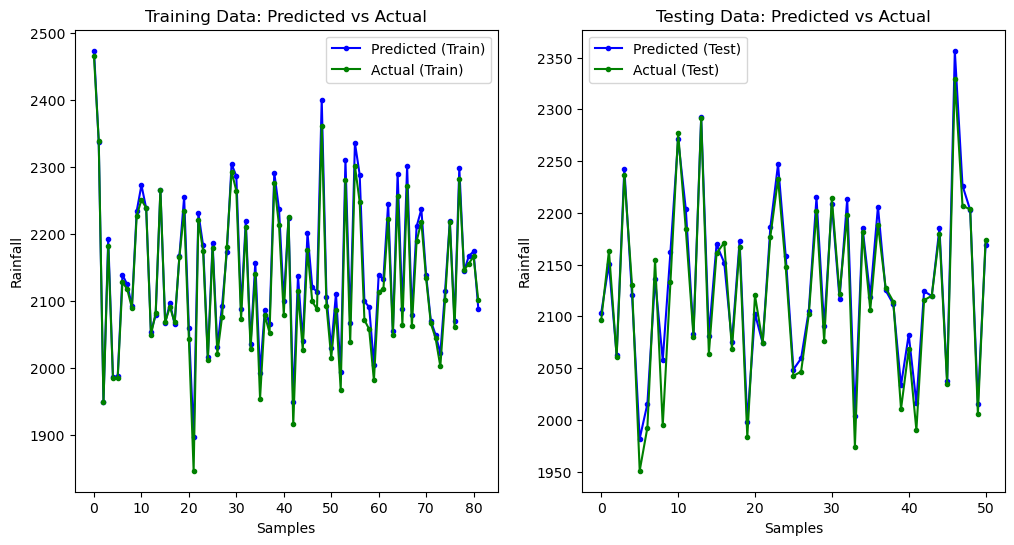

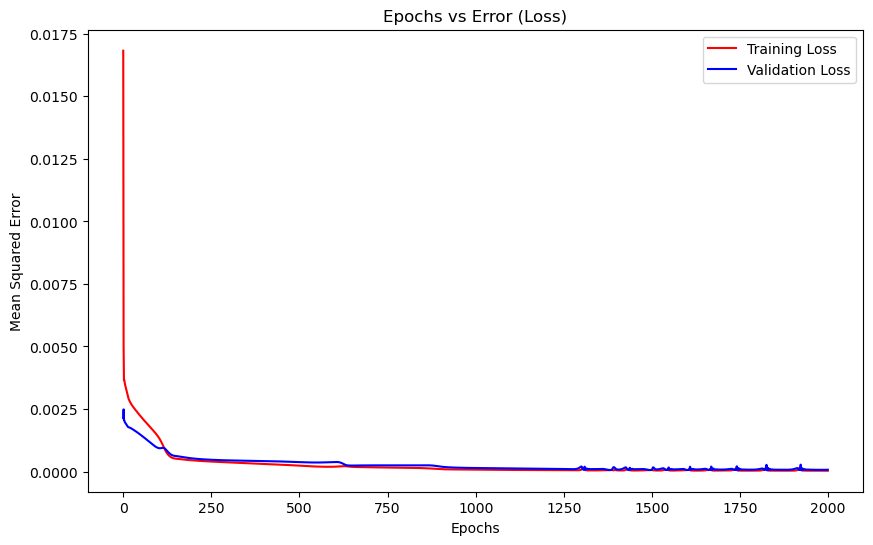

In [34]:
# Set random seeds
np.random.seed(2)
tf.random.set_seed(2)

# Define the number of layers and load the dataset
Layers = 7
dataset = Aug_Data_all[2]

# Prepare the input features and labels
X = dataset.iloc[:, 0:Layers+1].values
X = preprocessing.normalize(X)

y = X[:, Layers]
X = X[:, 0:Layers]

min_values = dataset.iloc[:, 0:Layers+1].min()
max_values = dataset.iloc[:, 0:Layers+1].max()

# Reshape X to be 3D for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
split_index = int(0.62 * len(X))  

# Sequentially split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

pm = X.shape[1]
print(X.shape[1])
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape in the Input layer
model.add(LSTM(units=Layers+1, kernel_initializer=Sivanandam(pm), activation='tanh'))  # Replace 'Sivanandam' with a standard initializer like glorot_uniform
model.add(Dense(units=1, kernel_initializer=Sivanandam(pm),activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=5,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False,
    # callbacks=[early_stopping]  # Add early stopping callback
)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match the shape of y_train and y_test
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

bp3_predictions_train = y_train_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp3_actual_train = y_train * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

bp3_predictions_test = y_test_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp3_actual_test = y_test * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

# Calculating statistics for training data
mean_pred_train = np.mean(bp3_predictions_train)
mean_act_train = np.mean(bp3_actual_train)
sd_pred_train = np.std(bp3_predictions_train)
sd_act_train = np.std(bp3_actual_train)
cc_train = np.corrcoef(bp3_predictions_train.flatten(), bp3_actual_train.flatten())[0, 1]
rmse_train = np.sqrt(np.mean((bp3_predictions_train - bp3_actual_train) ** 2))
pp_train = 100 * (mean_act_train - mean_pred_train) / mean_act_train

# Calculating statistics for testing data
mean_pred_test = np.mean(bp3_predictions_test)
mean_act_test = np.mean(bp3_actual_test)
sd_pred_test = np.std(bp3_predictions_test)
sd_act_test = np.std(bp3_actual_test)
cc_test = np.corrcoef(bp3_predictions_test.flatten(), bp3_actual_test.flatten())[0, 1]
rmse_test = np.sqrt(np.mean((bp3_predictions_test - bp3_actual_test) ** 2))
pp_test = 100 * (mean_act_test - mean_pred_test) / mean_act_test

# Output the results for training data
print(f"Training Data:")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"SD Observed: {sd_act_train}")
print(f"SD Predicted: {sd_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output the results for testing data
print(f"\nTesting Data:")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"SD Observed: {sd_act_test}")
print(f"SD Predicted: {sd_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Predicted vs Actual Results for Training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bp3_predictions_train, '.-', color='blue', label='Predicted (Train)')
plt.plot(bp3_actual_train, '.-', color='green', label='Actual (Train)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Training Data: Predicted vs Actual')
plt.legend()

# Plotting Predicted vs Actual Results for Testing data
plt.subplot(1, 2, 2)
plt.plot(bp3_predictions_test, '.-', color='blue', label='Predicted (Test)')
plt.plot(bp3_actual_test, '.-', color='green', label='Actual (Test)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Testing Data: Predicted vs Actual')
plt.legend()

plt.show()

# Plotting Epochs vs Error (Loss) for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs Error (Loss)')
plt.legend()
plt.show()


1
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Training Data:
Mean Observed: 2034.4578138347051
Mean Predicted: 2048.914306640625
SD Observed: 91.48061075051586
SD Predicted: 91.64862060546875
Correlation Coefficient (CC): 0.9904274793063302
Root Mean Squared Error (RMSE): 19.223354369993416
Percentage Bias (PP): -0.7105820876507216%

Testing Data:
Mean Observed: 2031.1721604204495
Mean Predicted: 2034.2025146484375
SD Observed: 74.11935516591095
SD Predicted: 74.7340316772461
Correlation Coefficient (CC): 0.9727852431063189
Root Mean Squared Error (RMSE): 17.63685927899735
Percentage Bias (PP): -0.14919238689057007%


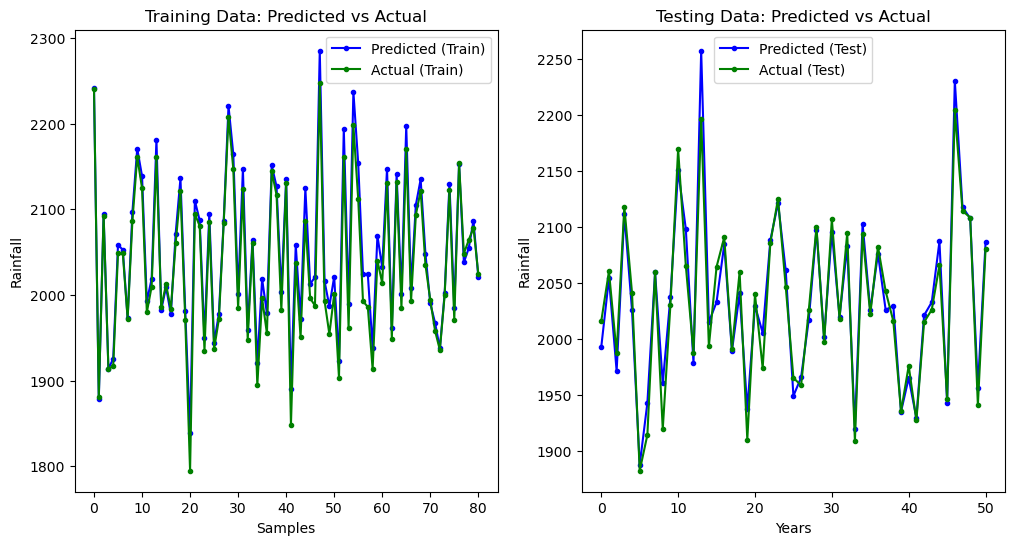

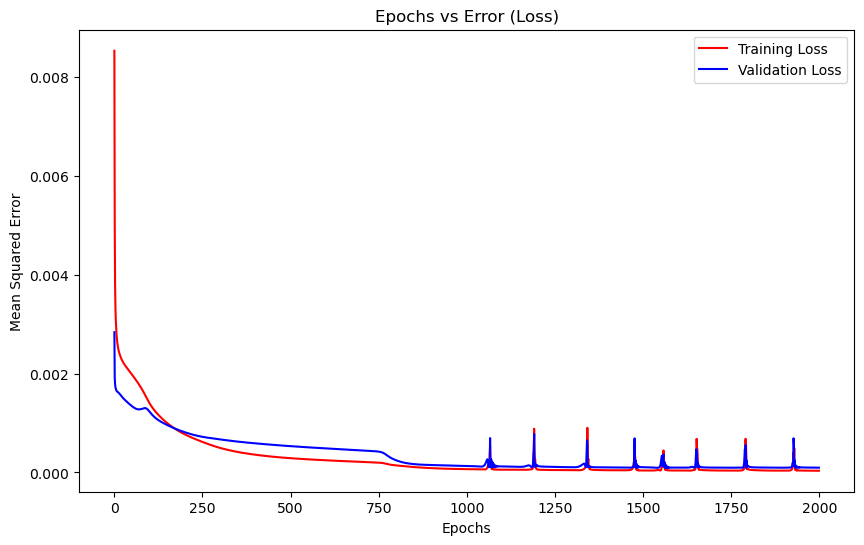

In [35]:
# Set random seeds
np.random.seed(2)
tf.random.set_seed(2)

# Define the number of layers and load the dataset
Layers = 8
dataset = Aug_Data_all[3]

# Prepare the input features and labels
X = dataset.iloc[:, 0:Layers+1].values
X = preprocessing.normalize(X)

y = X[:, Layers]
X = X[:, 0:Layers]

min_values = dataset.iloc[:, 0:Layers+1].min()
max_values = dataset.iloc[:, 0:Layers+1].max()

# Reshape X to be 3D for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
split_index = int(0.62 * len(X))  

# Sequentially split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

pm = X.shape[1]
print(X.shape[1])
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape in the Input layer
model.add(LSTM(units=Layers+1, kernel_initializer=Sivanandam(pm), activation='tanh'))  # Replace 'Sivanandam' with a standard initializer like glorot_uniform
model.add(Dense(units=1, kernel_initializer=Sivanandam(pm),activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=5,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False,
    # callbacks=[early_stopping]  # Add early stopping callback
)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match the shape of y_train and y_test
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

bp4_predictions_train = y_train_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp4_actual_train = y_train * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

bp4_predictions_test = y_test_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp4_actual_test = y_test * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

# Calculating statistics for training data
mean_pred_train = np.mean(bp4_predictions_train)
mean_act_train = np.mean(bp4_actual_train)
sd_pred_train = np.std(bp4_predictions_train)
sd_act_train = np.std(bp4_actual_train)
cc_train = np.corrcoef(bp4_predictions_train.flatten(), bp4_actual_train.flatten())[0, 1]
rmse_train = np.sqrt(np.mean((bp4_predictions_train - bp4_actual_train) ** 2))
pp_train = 100 * (mean_act_train - mean_pred_train) / mean_act_train

# Calculating statistics for testing data
mean_pred_test = np.mean(bp4_predictions_test)
mean_act_test = np.mean(bp4_actual_test)
sd_pred_test = np.std(bp4_predictions_test)
sd_act_test = np.std(bp4_actual_test)
cc_test = np.corrcoef(bp4_predictions_test.flatten(), bp4_actual_test.flatten())[0, 1]
rmse_test = np.sqrt(np.mean((bp4_predictions_test - bp4_actual_test) ** 2))
pp_test = 100 * (mean_act_test - mean_pred_test) / mean_act_test

# Output the results for training data
print(f"Training Data:")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"SD Observed: {sd_act_train}")
print(f"SD Predicted: {sd_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output the results for testing data
print(f"\nTesting Data:")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"SD Observed: {sd_act_test}")
print(f"SD Predicted: {sd_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Predicted vs Actual Results for Training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bp4_predictions_train, '.-', color='blue', label='Predicted (Train)')
plt.plot(bp4_actual_train, '.-', color='green', label='Actual (Train)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Training Data: Predicted vs Actual')
plt.legend()

# Plotting Predicted vs Actual Results for Testing data
plt.subplot(1, 2, 2)
plt.plot(bp4_predictions_test, '.-', color='blue', label='Predicted (Test)')
plt.plot(bp4_actual_test, '.-', color='green', label='Actual (Test)')
plt.xlabel('Years')
plt.ylabel('Rainfall')
plt.title('Testing Data: Predicted vs Actual')
plt.legend()

plt.show()

# Plotting Epochs vs Error (Loss) for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs Error (Loss)')
plt.legend()
plt.show()


1
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Training Data:
Mean Observed: 2001.611636586912
Mean Predicted: 2002.1136474609375
SD Observed: 82.52905094068922
SD Predicted: 53.09010314941406
Correlation Coefficient (CC): 0.8815049464827114
Root Mean Squared Error (RMSE): 43.649399461653545
Percentage Bias (PP): -0.025080333509725522%

Testing Data:
Mean Observed: 2000.7444290672481
Mean Predicted: 1999.6578369140625
SD Observed: 72.24895541002043
SD Predicted: 32.36745834350586
Correlation Coefficient (CC): 0.8516783905463539
Root Mean Squared Error (RMSE): 47.80605684177303
Percentage Bias (PP): 0.05430939291392615%


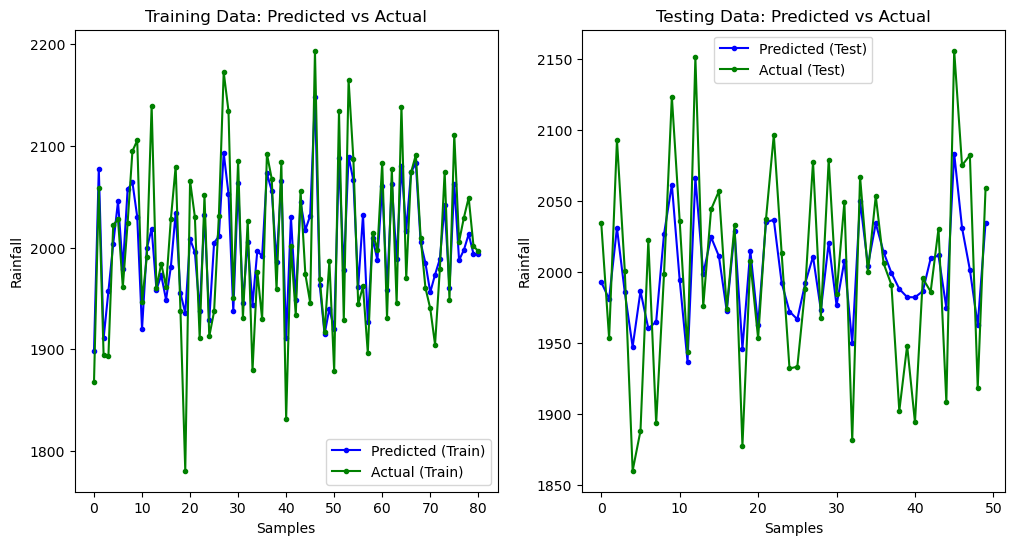

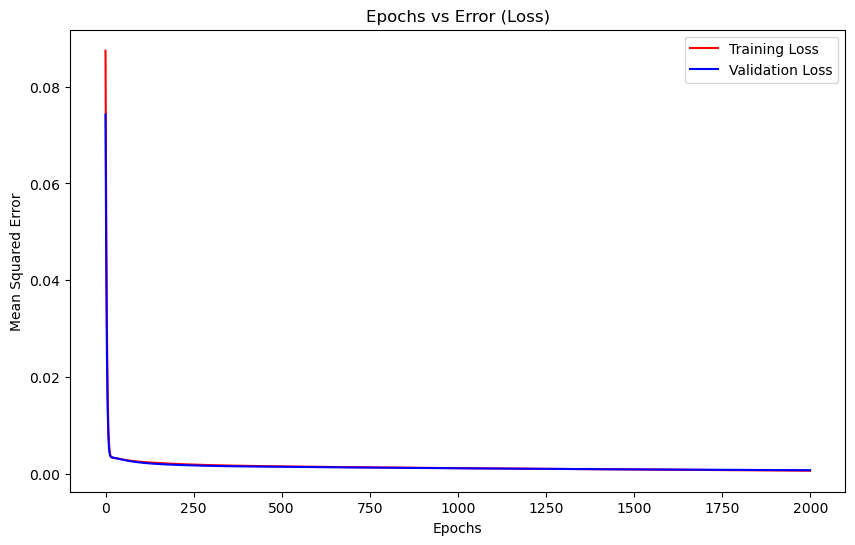

In [37]:
# Set random seeds
np.random.seed(2)
tf.random.set_seed(2)

# Define the number of layers and load the dataset
Layers = 9
dataset = Aug_Data_all[4]

# Prepare the input features and labels
X = dataset.iloc[:, 0:Layers+1].values
X = preprocessing.normalize(X)

y = X[:, Layers]
X = X[:, 0:Layers]

min_values = dataset.iloc[:, 0:Layers+1].min()
max_values = dataset.iloc[:, 0:Layers+1].max()

# Reshape X to be 3D for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
split_index = int(0.62 * len(X))  

# Sequentially split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

pm = X.shape[1]
print(X.shape[1])
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape in the Input layer
model.add(LSTM(units=Layers+1, kernel_initializer=Sivanandam(pm), activation='tanh'))  # Replace 'Sivanandam' with a standard initializer like glorot_uniform
model.add(Dense(units=1, kernel_initializer=Sivanandam(pm),activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False,
    # callbacks=[early_stopping]  # Add early stopping callback
)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match the shape of y_train and y_test
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

bp5_predictions_train = y_train_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp5_actual_train = y_train * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

bp5_predictions_test = y_test_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp5_actual_test = y_test * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

# Calculating statistics for training data
mean_pred_train = np.mean(bp5_predictions_train)
mean_act_train = np.mean(bp5_actual_train)
sd_pred_train = np.std(bp5_predictions_train)
sd_act_train = np.std(bp5_actual_train)
cc_train = np.corrcoef(bp5_predictions_train.flatten(), bp5_actual_train.flatten())[0, 1]
rmse_train = np.sqrt(np.mean((bp5_predictions_train - bp5_actual_train) ** 2))
pp_train = 100 * (mean_act_train - mean_pred_train) / mean_act_train

# Calculating statistics for testing data
mean_pred_test = np.mean(bp5_predictions_test)
mean_act_test = np.mean(bp5_actual_test)
sd_pred_test = np.std(bp5_predictions_test)
sd_act_test = np.std(bp5_actual_test)
cc_test = np.corrcoef(bp5_predictions_test.flatten(), bp5_actual_test.flatten())[0, 1]
rmse_test = np.sqrt(np.mean((bp5_predictions_test - bp5_actual_test) ** 2))
pp_test = 100 * (mean_act_test - mean_pred_test) / mean_act_test

# Output the results for training data
print(f"Training Data:")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"SD Observed: {sd_act_train}")
print(f"SD Predicted: {sd_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output the results for testing data
print(f"\nTesting Data:")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"SD Observed: {sd_act_test}")
print(f"SD Predicted: {sd_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Predicted vs Actual Results for Training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bp5_predictions_train, '.-', color='blue', label='Predicted (Train)')
plt.plot(bp5_actual_train, '.-', color='green', label='Actual (Train)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Training Data: Predicted vs Actual')
plt.legend()

# Plotting Predicted vs Actual Results for Testing data
plt.subplot(1, 2, 2)
plt.plot(bp5_predictions_test, '.-', color='blue', label='Predicted (Test)')
plt.plot(bp5_actual_test, '.-', color='green', label='Actual (Test)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Testing Data: Predicted vs Actual')
plt.legend()

plt.show()

# Plotting Epochs vs Error (Loss) for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs Error (Loss)')
plt.legend()
plt.show()


In [12]:
print("bp1 shape train",bp1_predictions_train.shape)
print("bp2 shape train",bp2_predictions_train.shape)
print("bp3 shape train",bp3_predictions_train.shape)
print("bp4 shape train",bp4_predictions_train.shape)
print("bp5 shape train",bp5_predictions_train.shape)


print("bp1 shape test",bp1_predictions_test.shape)
print("bp2 shape test",bp2_predictions_test.shape)
print("bp3 shape test",bp3_predictions_test.shape)
print("bp4 shape test",bp4_predictions_test.shape)
print("bp5 shape test",bp5_predictions_test.shape)


bp1 shape train (83,)
bp2 shape train (83,)
bp3 shape train (82,)
bp4 shape train (81,)
bp5 shape train (81,)
bp1 shape test (52,)
bp2 shape test (51,)
bp3 shape test (51,)
bp4 shape test (51,)
bp5 shape test (50,)


In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [27]:
print(len(ensemble_train))
print(ensemble_test[-1]=2159.682)
print(bp1_pred_test[-1])
print(bp2_pred_test[-2])
print(bp3_pred_test[-2])
print(bp4_pred_test[-2])
print(bp5_pred_test[-3])

83
1146.00439453125
2292.0088
2241.8896484375
2169.01806640625
2085.90087890625
2009.629638671875


Training Data Statistics (Ensemble):
Mean Observed: 2231.609164062433
Mean Predicted: 2097.8741234469126
Root Mean Squared Error (RMSE): 228.37425178085945
Standard Deviation Observed: 128.65398134461333
Standard Deviation Predicted: 172.18679820667322
Correlation Coefficient (CC): 0.26927871305835244
Percentage Bias (PP): 5.992762656166396%

Testing Data Statistics (Ensemble):
Mean Observed: 2229.291800404544
Mean Predicted: 2074.2577998234674
Root Mean Squared Error (RMSE): 295.9670586405038
Standard Deviation Observed: 99.13771312185173
Standard Deviation Predicted: 238.0110146339237
Correlation Coefficient (CC): 0.061802575443516854
Percentage Bias (PP): 6.954405903836505%


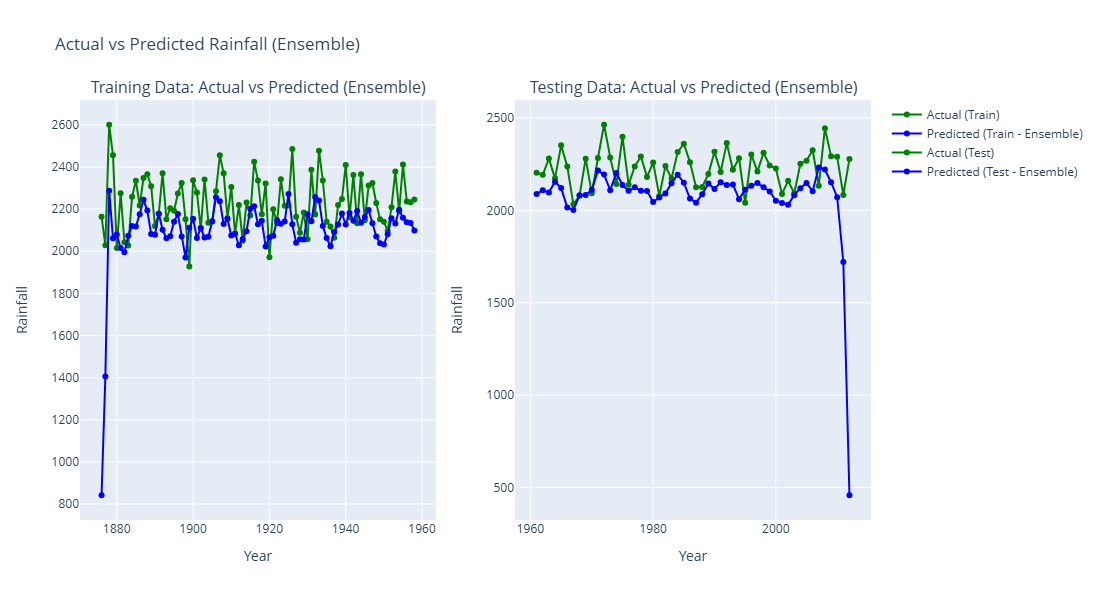

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a range of years for training and testing
train_years = np.arange(1876, 1876 + 83)  # Training data for 83 entries
test_years = np.arange(1961, 1961 + 52)   # Testing data for 52 entries

# Pad the prediction arrays to align their lengths for training (83 entries)
bp1_pred_train = bp1_predictions_train.flatten()[:83] 
bp2_pred_train = bp2_predictions_train.flatten()[:83]
bp3_pred_train = np.concatenate([np.zeros(1), bp3_predictions_train.flatten()])[:83]  # Pad with 1 zero
bp4_pred_train = np.concatenate([np.zeros(2), bp4_predictions_train.flatten()])[:83]  # Pad with 2 zeros
bp5_pred_train = np.concatenate([np.zeros(2), bp5_predictions_train.flatten()])[:83]  # Pad with 2 zeros

# Create the ensemble for training by averaging the predictions
ensemble_train = np.mean([bp1_pred_train, bp2_pred_train,bp3_pred_train,bp4_pred_train,bp5_pred_train], axis=0)

# Store the training predictions and actual values in a DataFrame
df_train = pd.DataFrame({
    'Year': train_years,
    'Actual': bp1_actual_train.flatten()[:83],  # Assuming all models have the same actual values
    'BP1': bp1_pred_train,
    'BP2': bp2_pred_train,
    'BP3': bp3_pred_train,
    'BP4': bp4_pred_train,
    'BP5': bp5_pred_train,
    'Ensemble': ensemble_train
})

# Pad the prediction arrays to align their lengths for testing (52 entries)
bp1_pred_test = bp1_predictions_test.flatten()[:52]
bp2_pred_test = np.concatenate([bp2_predictions_test.flatten(), np.zeros(1)])[:52]  # Pad with 1 zero
bp3_pred_test = np.concatenate([bp3_predictions_test.flatten(), np.zeros(1)])[:52]  # Pad with 1 zero
bp4_pred_test = np.concatenate([bp4_predictions_test.flatten(), np.zeros(1)])[:52]  # Pad with 1 zero
bp5_pred_test = np.concatenate([bp5_predictions_test.flatten(), np.zeros(2)])[:52]  # Pad with 2 zeros

# Create the ensemble for testing by averaging the predictions
ensemble_test = np.mean([bp1_pred_test, bp2_pred_test,bp3_pred_test,bp4_pred_test,bp5_pred_test], axis=0)

# Store the testing predictions and actual values in a DataFrame
df_test = pd.DataFrame({
    'Year': test_years,
    'Actual': bp1_actual_test.flatten()[:52],
    'BP1': bp1_pred_test,
    'BP2': bp2_pred_test,
    'BP3': bp3_pred_test,
    'BP4': bp4_pred_test,
    'BP5': bp5_pred_test,
    'Ensemble': ensemble_test
})

# Function to calculate statistics: Mean, RMSE, Std Dev, CC, PP
def calculate_statistics(actual, predicted):
    mean_act = np.mean(actual)
    mean_pred = np.mean(predicted)
    rmse = np.sqrt(np.mean((predicted - actual) ** 2))
    std_act = np.std(actual)
    std_pred = np.std(predicted)
    cc = np.corrcoef(predicted.values.flatten(), actual.values.flatten())[0, 1]
    pp = 100 * (mean_act - mean_pred) / mean_act
    return mean_act, mean_pred, rmse, std_act, std_pred, cc, pp

# Calculate statistics for training data (ensemble)
mean_act_train, mean_pred_train, rmse_train, std_act_train, std_pred_train, cc_train, pp_train = calculate_statistics(df_train['Actual'], df_train['Ensemble'])

# Calculate statistics for testing data (ensemble)
mean_act_test, mean_pred_test, rmse_test, std_act_test, std_pred_test, cc_test, pp_test = calculate_statistics(df_test['Actual'], df_test['Ensemble'])

# Output statistics for training data
print("Training Data Statistics (Ensemble):")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Standard Deviation Observed: {std_act_train}")
print(f"Standard Deviation Predicted: {std_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output statistics for testing data
print("\nTesting Data Statistics (Ensemble):")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Standard Deviation Observed: {std_act_test}")
print(f"Standard Deviation Predicted: {std_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Actual vs Predicted for Training (Ensemble)
fig = make_subplots(rows=1, cols=2, subplot_titles=("Training Data: Actual vs Predicted (Ensemble)", "Testing Data: Actual vs Predicted (Ensemble)"))

# Training Data: Actual vs Predicted
fig.add_trace(
    go.Scatter(
        x=df_train['Year'],
        y=df_train['Actual'],
        mode='lines+markers',
        name='Actual (Train)',
        line=dict(color='green')
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=df_train['Year'],
        y=df_train['Ensemble'],
        mode='lines+markers',
        name='Predicted (Train - Ensemble)',
        line=dict(color='blue')
    ),
    row=1, col=1
)

# Testing Data: Actual vs Predicted
fig.add_trace(
    go.Scatter(
        x=df_test['Year'],
        y=df_test['Actual'],
        mode='lines+markers',
        name='Actual (Test)',
        line=dict(color='green')
    ),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(
        x=df_test['Year'],
        y=df_test['Ensemble'],
        mode='lines+markers',
        name='Predicted (Test - Ensemble)',
        line=dict(color='blue')
    ),
    row=1, col=2
)

# Update layout for titles and axis labels
fig.update_layout(
    height=600, width=1200,
    title_text="Actual vs Predicted Rainfall (Ensemble)",
    showlegend=True
)

fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=2)
fig.update_yaxes(title_text="Rainfall", row=1, col=1)
fig.update_yaxes(title_text="Rainfall", row=1, col=2)

# Display the figure
fig.show()